# Practice - Tensorflow Datasets - SOLUTION


<h1>Tensorflow Datasets (Practice)</h1>
<ul><li>For this assignment, you will be working with the Dangerous Farm Insects data set from Kaggle: <a href="https://www.kaggle.com/datasets/tarundalal/dangerous-insects-dataset">https://www.kaggle.com/datasets/tarundalal/dangerous-insects-dataset</a></li></ul>
<p>The dataset has images of 15 different types of dangerous insects. <br><em>Note: Due to the larger number of classes in the dataset (15), the accuracy for your baseline model is going to be fairly low (&lt;50%).</em></p><p><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1692317485__Screenshot20230817at81117PM.png" style="color: rgb(51, 51, 51);"></p>
<h2>Getting Started</h2>
<ul><li>Create a new GitHub repository for this assignment.</li><li>Extract the downloaded data into a folder in your repository. </li><li>Start a new Jupyter notebook for this assignment.</li></ul>
<h2>Create a Tensorflor Image Dataset</h2>
<ul><li><strong>Create a Dataset using the tf.keras.image_dataset_from_directory function, using the following parameters:</strong><ul><li>label_model='categorical'</li><li>image_width=128 </li><li>image_height = 128</li><li>batch_size=32</li><li>a random seed</li></ul></li></ul>
<ul><li><strong>Save the class_names and number of classes as variables to reuse later.</strong> </li><li><strong>Create a class_dict that has integers as the keys with the corresponding class names (sorted alphabetically)</strong><br>
</li><li><strong>Split the dataset into a 70% training, 20 % validation, and 10% test split.</strong><ul><li>Hint: use .take() and .skip()</li></ul></li></ul>
<h2>Optimize the Dataset</h2>
<ul><li><strong>Add a shuffle step to the training dataset.</strong></li><li><strong>Add caching and prefetching to all 3 datasets</strong><ul><li>Note: if you have hardware issues using caching and prefetching<strong>, you may skip this requirement.</strong></li></ul></li></ul>
<h2>Preview the Data and Save the Shape</h2>
<ul><li><strong>Retrieve a batch of training data and save the first image's shape to use in your model's input_shape.</strong></li><li><strong>Display an example image. </strong></li><li><strong>Display an example label.</strong></li></ul>
<p><span style="background-color: initial; color: rgb(62, 78, 90); font-family: Gotham-Rounded-Bold; font-size: 18px; font-weight: 700;">Build a Simple CNN Model</span><br></p>
<ul><li><strong>Build a simple Convolutional Neural Network with:</strong><ul><li>1) a Rescaling layer</li><li>2) Conv2D layer with:<ul><li>16 filters</li><li>Kernel size = 3</li><li>padding='same'</li></ul></li><li>3)  MaxPooling Layer with:<ul><li>pool_size=2</li></ul></li><li>4) Conv2D layer with:<ul><li>32 filters</li><li>Kernel size = 3</li><li>padding='same'</li></ul></li></ul><ul><li>5) MaxPooling Layer with:<ul><li>pool_size=2</li></ul></li><li>6) a flattening layer</li><li>7) final Dense layer with appropriate settings (for the task):<ul><li> the correct number of units </li><li>and activation function </li></ul></li><li>8) Compile the model with:<ul><li>The appropriate loss function</li><li>optimizer='adam' (or use the class: tf.keras.optimizers.Adam())</li><li>metrics=['accuracy']</li><li>loss = "categorical_crossentropy" (or use the class: tf.keras.losses.CategoricalCrossentropy())</li></ul></li></ul></li></ul>
<figure><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1692318050__practicedatasetscnn.png" style="width: 486px; height: 336px;" width="486" height="336"></figure>
<h2>Fit the Model </h2>
<ul><li>Fit the model using:<ul><li>the training ds as the training data, </li></ul><ul><li>Use the validation ds as the validation_data</li><li>10 epochs</li></ul></li><li>Save the model.fit()'s history </li></ul>
<h2>Evaluate the Model</h2>
<p><em>Reminder: Due to the larger number of classes in the dataset (15), the accuracy for your baseline model is going to be fairly low (&lt;50%).</em></p>
<ul><li>Plot the model's training history.</li><li>Evaluate the model on  the training and test data, including:<ul><li>Scikit-learn confusion matrix </li><li>Scikit-learn classification report</li><li>The results from model.evaluate method.</li><li><em>(Tip: use your custom flexible evaluation functions.)</em></li></ul></li></ul>
<p><br></p>
<h2><a href="https://github.com/coding-dojo-data-science/intermediate-ml-practice-solutions/blob/main/04-ComputerVision/Tensorflow-Datasets-Practice-SOLUTION.ipynb" target="_blank">Solution Notebook</a></h2>

# SOLUTION CODE

In [1]:
import numpy as np
import tensorflow as tf

# Set the seed for NumPy
np.random.seed(42)

# Set the seed for TensorFlow
tf.random.set_seed(42)

import os, glob
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
tf.__version__

'2.12.0'

In [2]:
# Custom functions: add to lesson notebook instead of file
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.abspath("../Functions/"))

import ann_functions as af

## Geting the source code for functions to display in notebook (for convenience)
import inspect
from IPython.display import Markdown, display
source_code = inspect.getsource(af)
display(Markdown(f"```python\n{source_code}\n```"))

```python
"""Functions from Intermediate Machine Learning Wk3-4 Lessons"""
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


def plot_history(history,figsize=(6,8)):
    # Get a unique list of metrics 
    all_metrics = np.unique([k.replace('val_','') for k in history.history.keys()])

    # Plot each metric
    n_plots = len(all_metrics)
    fig, axes = plt.subplots(nrows=n_plots, figsize=figsize)
    axes = axes.flatten()

    # Loop through metric names add get an index for the axes
    for i, metric in enumerate(all_metrics):

        # Get the epochs and metric values
        epochs = history.epoch
        score = history.history[metric]

        # Plot the training results
        axes[i].plot(epochs, score, label=metric, marker='.')
        # Plot val results (if they exist)
        try:
            val_score = history.history[f"val_{metric}"]
            axes[i].plot(epochs, val_score, label=f"val_{metric}",marker='.')
        except:
            pass

        finally:
            axes[i].legend()
            axes[i].set(title=metric, xlabel="Epoch",ylabel=metric)

    # Adjust subplots and show
    fig.tight_layout()
    plt.show()


def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
    
    # Get predictions for training data
    y_train_pred = model.predict(X_train)
    
    # Call the helper function to obtain regression metrics for training data
    results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
    print()
    # Get predictions for test data
    y_test_pred = model.predict(X_test)
    # Call the helper function to obtain regression metrics for test data
    results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
    if output_dict == True:
        # Store results in a dataframe if ouput_frame is True
        results_dict = {'train':results_train,
                    'test': results_test}
        return results_dict


### FINAL FROM FLEXIBILE EVAL FUNCTIONS LESSON
   
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):
    """Modified version of classification metrics function from Intro to Machine Learning.
    Updates:
    - Reversed raw counts confusion matrix cmap  (so darker==more).
    - Added arg for normalized confusion matrix values_format
    """
    # Get the classification report
    report = classification_report(y_true, y_pred)
    
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    
    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None, 
                                            cmap='gist_gray_r',# Updated cmap
                                            values_format="d", 
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")

    
    # Create a confusion matrix with the data with normalize argument 
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap, 
                                            values_format=values_format, #New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict


##########

def get_true_pred_labels(model,ds):
    """Gets the labels and predicted probabilities from a Tensorflow model and Dataset object.
    Adapted from source: https://stackoverflow.com/questions/66386561/keras-classification-report-accuracy-is-different-between-model-predict-accurac
    """
    y_true = []
    y_pred_probs = []
    
    # Loop through the dataset as a numpy iterator
    for images, labels in ds.as_numpy_iterator():
        
        # Get prediction with batch_size=1
        y_probs = model.predict(images, batch_size=1, verbose=0)

        # Combine previous labels/preds with new labels/preds
        y_true.extend(labels)
        y_pred_probs.extend(y_probs)

    ## Convert the lists to arrays
    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)
    
    return y_true, y_pred_probs
    

def convert_y_to_sklearn_classes(y, verbose=False):
    # If already one-dimension
    if np.ndim(y)==1:
        if verbose:
            print("- y is 1D, using it as-is.")
        return y
        
    # If 2 dimensions with more than 1 column:
    elif y.shape[1]>1:
        if verbose:
            print("- y has is 2D with >1 column. Using argmax for metrics.")   
        return np.argmax(y, axis=1)
    
    else:
        if verbose:
            print("y has 2D with 1 column. Using round for metrics.")
        return np.round(y).flatten().astype(int)


def evaluate_classification_network(model, 
                                    X_train=None, y_train=None, 
                                    X_test=None, y_test=None,
                                    history=None, history_figsize=(6,6),
                                    figsize=(6,4), normalize='true',
                                    output_dict = False,
                                    cmap_train='Blues',
                                    cmap_test="Reds",
                                    values_format=".2f", 
                                    colorbar=False):
    """Evaluates a neural network classification task using either
    separate X and y arrays or a tensorflow Dataset
    
    Data Args:
        X_train (array, or Dataset)
        y_train (array, or None if using a Dataset
        X_test (array, or Dataset)
        y_test (array, or None if using a Dataset)
        history (history object)
        """
    # Plot history, if provided
    if history is not None:
        plot_history(history, figsize=history_figsize)

    ## Adding a Print Header
    print("\n"+'='*80)
    print('- Evaluating Network...')
    print('='*80)

    
    ## TRAINING DATA EVALUATION
    # check if X_train was provided
    if X_train is not None:
        ## Check if X_train is a dataset
        if hasattr(X_train,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_train, y_train_pred = get_true_pred_labels(model, X_train)
        else:
            # Get predictions for training data
            y_train_pred = model.predict(X_train)

        ## Pass both y-vars through helper compatibility function
        y_train = convert_y_to_sklearn_classes(y_train)
        y_train_pred = convert_y_to_sklearn_classes(y_train_pred)
        
        # Call the helper function to obtain regression metrics for training data
        results_train = classification_metrics(y_train, y_train_pred, 
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_train,
                                               values_format=values_format,
                                         label='Training Data')
        
        ## Run model.evaluate         
        print("\n- Evaluating Training Data:")
        print(model.evaluate(X_train, return_dict=True))
    
    # If no X_train, then save empty list for results_train
    else:
        results_train = []


    ## TEST DATA EVALUATION
    # check if X_test was provided
    if X_test is not None:
        ## Check if X_train is a dataset
        if hasattr(X_test,'map'):
            # If it IS a Datset:
            # extract y_train and y_train_pred with helper function
            y_test, y_test_pred = get_true_pred_labels(model, X_test)
        else:
            # Get predictions for training data
            y_test_pred = model.predict(X_test)

        ## Pass both y-vars through helper compatibility function
        y_test = convert_y_to_sklearn_classes(y_test)
        y_test_pred = convert_y_to_sklearn_classes(y_test_pred)
        
        # Call the helper function to obtain regression metrics for training data
        results_test = classification_metrics(y_test, y_test_pred, 
                                         output_dict=True, figsize=figsize,
                                             colorbar=colorbar, cmap=cmap_test,
                                              values_format=values_format,
                                         label='Test Data')
        
        ## Run model.evaluate         
        print("\n- Evaluating Test Data:")
        print(model.evaluate(X_test, return_dict=True))
      
    # If no X_test, then save empty list for results_test
    else:
        results_test = []
      

    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict


```

### Create a Tensorflow Image Dataset

In [3]:
# Checking the contents of xrays folder
data_dir = "Data/Dangerous Insects/farm_insects/"
data_dir

'Data/Dangerous Insects/farm_insects/'

In [4]:
# Getting list of img file paths (ONLY, did not make recursuve so no folders)
img_files = glob.glob(data_dir+"**/*")#, recursive=True)
len(img_files)

1591

In [5]:
# Preview an example image (at full size)
img_loaded = load_img(img_files[0])
img_data = img_to_array(img_loaded)
img_data.shape

(1250, 1000, 3)

In [6]:
# Saving image params as vars for reuse
batch_size = 32
img_height = 128
img_width = 128

In [7]:
# make the dataset from the main folder of images
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    label_mode="categorical",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

ds

Found 1591 files belonging to 15 classes.
Metal device set to: Apple M1 Pro


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>

In [8]:
len(ds)

50

In [9]:
## Set the size of the 
split_train = 0.7
split_val = 0.2
split_test = 0.1

# Calculate the number of batches for training and validation data 
n_train_batches =  int(len(ds) * split_train)
n_val_batches = int(len(ds) * split_val)

print(f"Use {n_train_batches} batches as training data")
print(f"Use {n_val_batches} batches as validation data")
print(f"The remaining {len(ds)- (n_train_batches+n_val_batches)} batches will be used as test data.")

Use 35 batches as training data
Use 10 batches as validation data
The remaining 5 batches will be used as test data.


In [10]:
# Use .take to slice out the number of batches 
train_ds = ds.take(n_train_batches)
len(train_ds)

35

In [11]:
## Create the val_ds from original ds

# 1. Skipping over the training batches
val_ds = ds.skip(n_train_batches)

# 2. Taking the correct number of validation batches
val_ds = val_ds.take(n_val_batches)
len(val_ds)

10

In [12]:
# Create the test split from ds

# SKip over all of the training + val images
test_ds = ds.skip(n_train_batches + n_val_batches)
len(test_ds)

5

In [13]:
# Determine number of batches in dataset
ds_size = len(ds)
ds_size

50

### Preview the Data

In [14]:
# checking the class names
class_names = ds.class_names

class_dict = dict(zip(range(len(class_names)), class_names))
class_dict

{0: 'Africanized Honey Bees (Killer Bees)',
 1: 'Aphids',
 2: 'Armyworms',
 3: 'Brown Marmorated Stink Bugs',
 4: 'Cabbage Loopers',
 5: 'Citrus Canker',
 6: 'Colorado Potato Beetles',
 7: 'Corn Borers',
 8: 'Corn Earworms',
 9: 'Fall Armyworms',
 10: 'Fruit Flies',
 11: 'Spider Mites',
 12: 'Thrips',
 13: 'Tomato Hornworms',
 14: 'Western Corn Rootworms'}

In [15]:
# Saving # of classes for reuse
num_classes = len(class_names)
num_classes

15

In [16]:
# Batch Size
batch_size

32

In [17]:
# taking a sample banch to see batch shape
example_batch_imgs,example_batch_y= train_ds.take(1).get_single_element()
example_batch_imgs.shape

2023-08-24 17:58:37.283852: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


TensorShape([32, 128, 128, 3])

In [18]:
# individual image shape
# individual image shape
input_shape = example_batch_imgs[0].shape
input_shape

TensorShape([128, 128, 3])

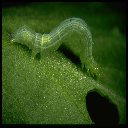

In [19]:
array_to_img(example_batch_imgs[0])

In [20]:
# Demo Unpacking shape
[*input_shape]

[128, 128, 3]

### Optimize Dataset Performance

In [21]:
# Use autotune to automatically determine best buffer sizes 
AUTOTUNE = tf.data.AUTOTUNE

# ORIGINAL SHUFFLED TRAIN
train_ds = train_ds.cache().shuffle(buffer_size= len(train_ds),
                                   seed=42).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Training Baseline CNN

In [22]:
def build_model1(name="CNN1", input_shape=input_shape):
    model = models.Sequential(name=name)
    # Using rescaling layer to scale pixel values
    model.add(layers.Rescaling(1.0 / 255, input_shape=input_shape))

    # Convolutional layer
    model.add(
        layers.Conv2D(
            filters=16,  # How many filters you want to use
            kernel_size=3,  # size of each filter
            input_shape=input_shape,
            padding="same",
        )
    )
    # Pooling layer
    model.add(layers.MaxPooling2D(pool_size=2))  # Size of pooling

    # Convolutional layer
    model.add(
        layers.Conv2D(
            filters=32,  # How many filters you want to use
            kernel_size=3,  # size of each filter
            input_shape=input_shape,
            padding="same",
        )
    )
    # Pooling layer
    model.add(layers.MaxPooling2D(pool_size=2))  # Size of pooling

    # Flattening layer
    model.add(layers.Flatten())
    # Output layer
    model.add(
        layers.Dense(
            len(class_names), activation="softmax"
        )  # How many output possibilities we have
    )  # What activation function are you using?

    model.compile(
        optimizer="adam",
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=["accuracy"],
    )

    model.summary()
    return model

### Model 1: Basline Model

In [23]:
# Build fresh model and train
model1 = build_model1(name="Model1")

# fit the neural network
history = model1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0    

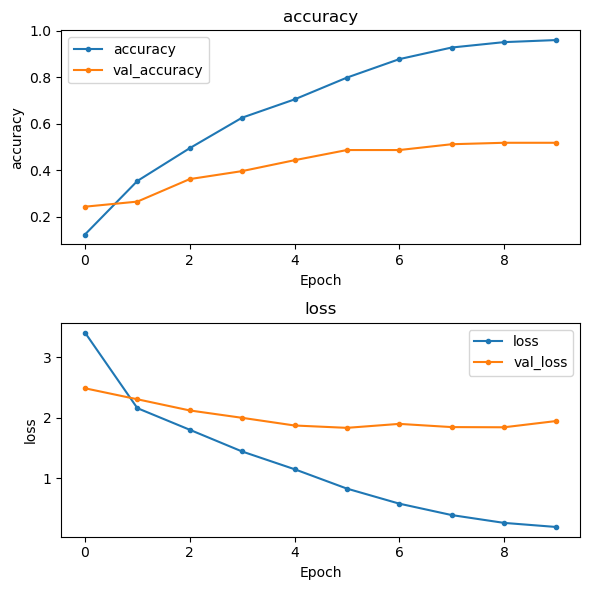


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       0.99      1.00      0.99        67
           2       0.86      0.93      0.89        73
           3       1.00      1.00      1.00        83
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        69
           6       1.00      1.00      1.00        80
           7       1.00      1.00      1.00        81
           8       1.00      1.00      1.00        78
           9       0.95      0.84      0.89        85
          10       0.92      0.99      0.95        72
          11       1.00      1.00      1.00        82
          12       0.97      0.96      0.97        75
          13       1.00      1.00    

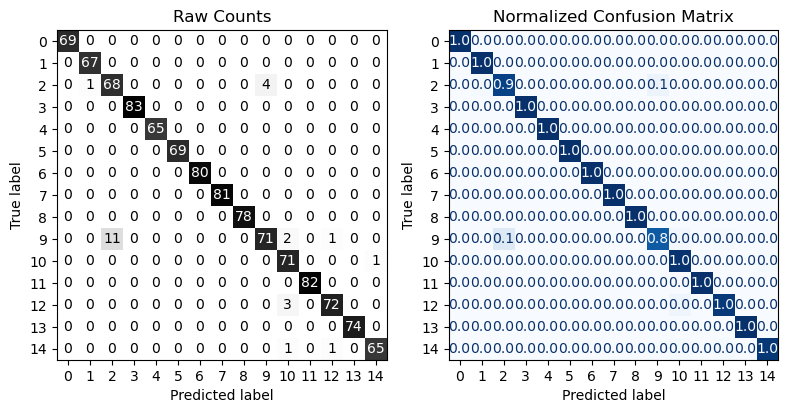


- Evaluating Training Data:
35/35 [==============================] - 0s 11ms/step - loss: 0.1161 - accuracy: 0.9777
{'loss': 0.1160658448934555, 'accuracy': 0.9776785969734192}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.27      0.38      0.32         8
           2       0.11      0.12      0.12         8
           3       0.50      0.44      0.47         9
           4       0.40      0.55      0.46        11
           5       0.80      0.57      0.67        14
           6       0.75      0.55      0.63        11
           7       0.14      0.20      0.17         5
           8       0.88      0.50      0.64        14
           9       0.38      0.43      0.40         7
          10       0.38      0.56      0.45       

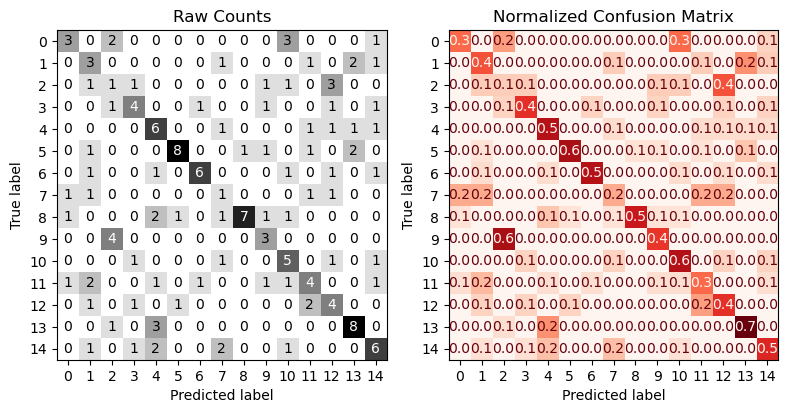


- Evaluating Test Data:
5/5 [==============================] - 0s 17ms/step - loss: 2.2361 - accuracy: 0.4570
{'loss': 2.2361130714416504, 'accuracy': 0.45695364475250244}


In [24]:
# Use evaluation function
af.evaluate_classification_network(
    model1,
    X_train=train_ds,
    X_test=test_ds,
    history=history,
    figsize=(8, 8),
    values_format=".1f",
);